In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

df=pd.read_csv(r"E:\Project_4\DATA\Sample - Superstore.csv", encoding="ISO-8859-1")

df.columns

df.info()
df.describe()




<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9994 non-null   int64  
 1   Order ID       9994 non-null   object 
 2   Order Date     9994 non-null   object 
 3   Ship Date      9994 non-null   object 
 4   Ship Mode      9994 non-null   object 
 5   Customer ID    9994 non-null   object 
 6   Customer Name  9994 non-null   object 
 7   Segment        9994 non-null   object 
 8   Country        9994 non-null   object 
 9   City           9994 non-null   object 
 10  State          9994 non-null   object 
 11  Postal Code    9994 non-null   int64  
 12  Region         9994 non-null   object 
 13  Product ID     9994 non-null   object 
 14  Category       9994 non-null   object 
 15  Sub-Category   9994 non-null   object 
 16  Product Name   9994 non-null   object 
 17  Sales          9994 non-null   float64
 18  Quantity

,Row ID,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,4997.500000,55190.379428,229.858001,3.789574,0.156203,28.656896
std,2885.163629,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1.000000,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,2499.250000,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,4997.500000,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,7495.750000,90008.000000,209.940000,5.000000,0.200000,29.364000
max,9994.000000,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In [8]:
# Ustun nomlarini standartlahtiramiz (KeyError ning oldini oladi)

df.columns=[col.lower().replace(' ', '_').replace('-', '_') for col in df.columns]

# Tekshiramiz 
print("To'g'irlangan ustunlar", df.columns.tolist())

To'g'irlangan ustunlar ['row_id', 'order_id', 'order_date', 'ship_date', 'ship_mode', 'customer_id', 'customer_name', 'segment', 'country', 'city', 'state', 'postal_code', 'region', 'product_id', 'category', 'sub_category', 'product_name', 'sales', 'quantity', 'discount', 'profit']


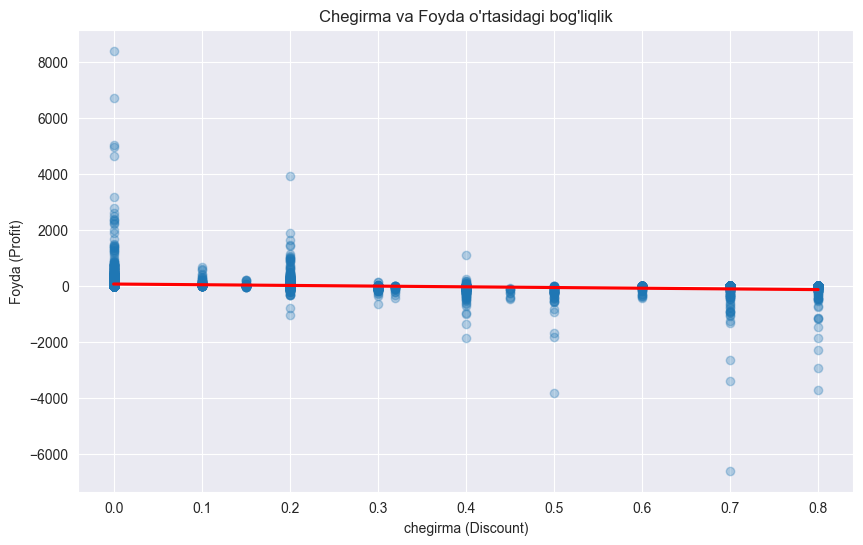

In [9]:
# Grafik chizish

plt.figure(figsize=(10, 6))

sns.regplot(data=df,  x='discount', y='profit', 
            scatter_kws={'alpha': 0.3},
            line_kws={'color': 'red'})

plt.title("Chegirma va Foyda o'rtasidagi bog'liqlik")
plt.xlabel("chegirma (Discount)")
plt.ylabel("Foyda (Profit)")
plt.show()

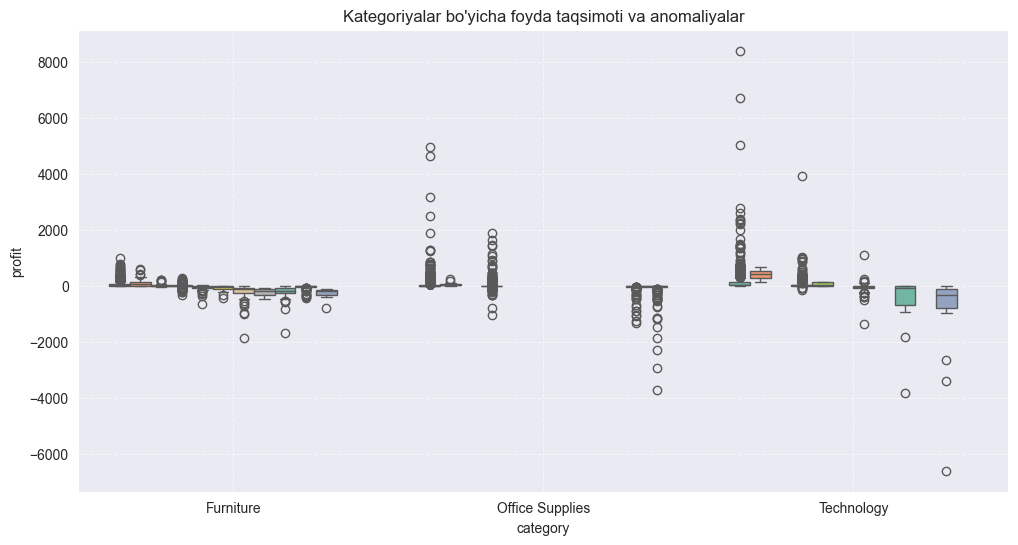

In [11]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='category', y='profit', palette='Set2', hue='discount', legend=False)
plt.title("Kategoriyalar bo'yicha foyda taqsimoti va anomaliyalar")
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

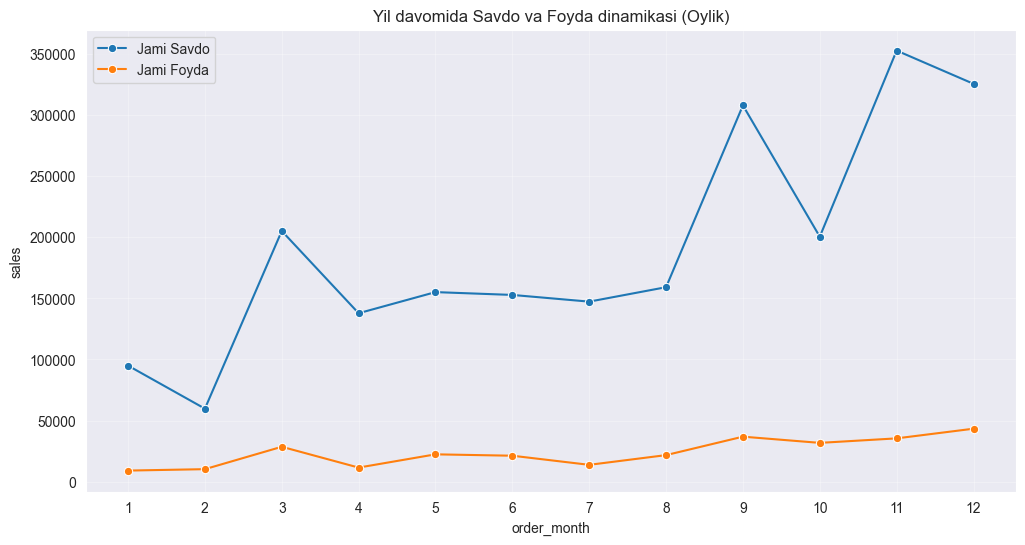

In [12]:
# Sanani formatlash
df['order_date']=pd.to_datetime(df['order_date'])
df['order_month']=df['order_date'].dt.month
df['order_year']=df['order_date'].dt.year

# Oylar kesimida foyda va savdo dinamikasi
monthly_data=df.groupby('order_month')[['sales', 'profit']].sum().reset_index()

plt.figure(figsize=(12, 6))
sns.lineplot(data=monthly_data, x='order_month', y='sales', label='Jami Savdo', marker='o')
sns.lineplot(data=monthly_data, x='order_month', y='profit', label='Jami Foyda', marker='o')

plt.title("Yil davomida Savdo va Foyda dinamikasi (Oylik)")
plt.xticks(range(1, 13))
plt.grid(True, alpha=0.3)
plt.legend()
plt.show()
# garfikdan ma'lumki savdo hajmi va foyda orasida nomutanosiblik mavjud

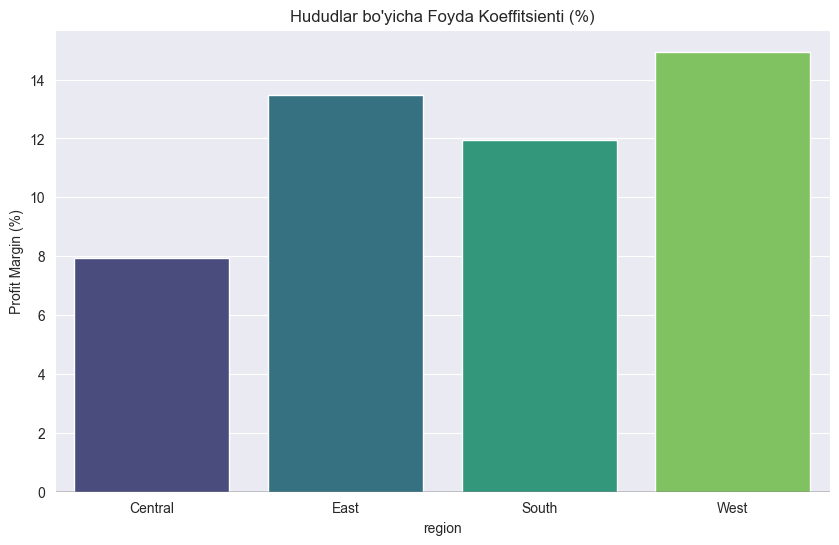

In [14]:
# Hududlar bo'yicha savdo va foydaning nisbatini ko'ramiz
region_analysis=df.groupby('region')[['sales', 'profit']].sum().reset_index()

# Foyda koeffitsientini hisoblaymiz
region_analysis['profit_margin']=(region_analysis['profit']/region_analysis['sales'])*100

plt.figure(figsize=(10, 6))
sns.barplot(data=region_analysis, x='region', y='profit_margin', palette='viridis', hue='region')
plt.title("Hududlar bo'yicha Foyda Koeffitsienti (%)")
plt.ylabel("Profit Margin (%)")
plt.axhline(0, color='black', linewidth=1)
plt.show()

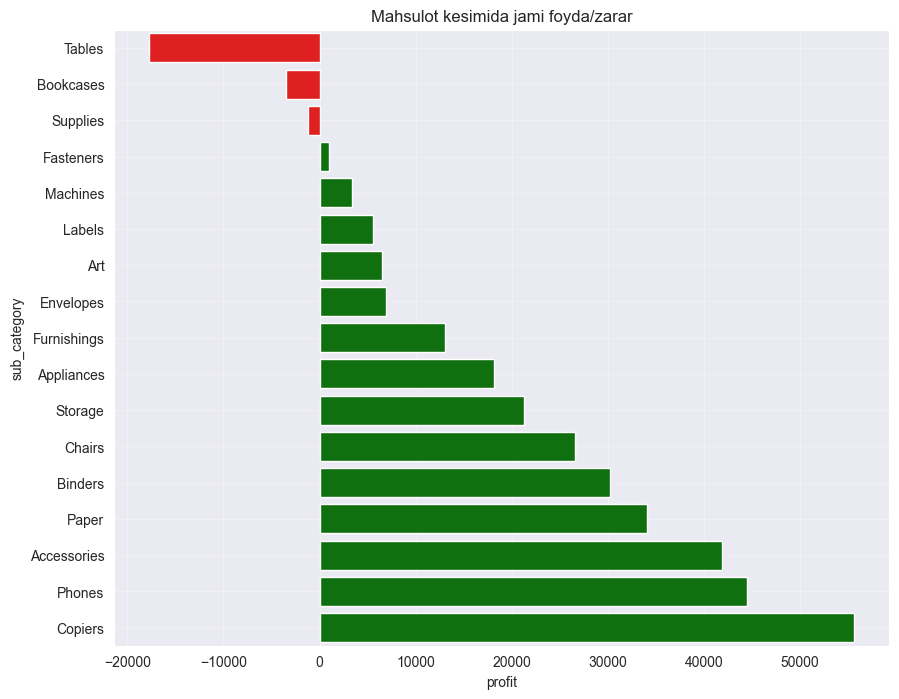

In [17]:
# Sub-Category bo'yicha foyda tahlili
sub_cat=df.groupby('sub_category')['profit'].sum().sort_values().reset_index()

plt.figure(figsize=(10, 8))
# Manfiy foydalarni qizil, ijobiylarni yashil qilamiz
colors=['red' if x<0 else 'green' for x in sub_cat['profit']]

sns.barplot(data=sub_cat, x='profit', y='sub_category', palette=colors,
            hue='sub_category')
plt.title("Mahsulot kesimida jami foyda/zarar")
plt.grid(True, alpha=0.3)
plt.show()

In [18]:
# Hududlar bo'yicha o'rtacha chegirma va jami foyda
region_stats=df.groupby('region').agg({
    'discount':'mean',
    'profit':'sum',
    'sales':'sum'
}).reset_index()

# Foyda koeffitsientini (%) yana bir bor aniqlik uchun qo'shamiz
region_stats['profit_margin_%']=(region_stats['profit']/region_stats['sales'])*100

print("Hududlar bo'yicha statistika: ")
print(region_stats.sort_values(by='discount', ascending=False))

Hududlar bo'yicha statistika: 
    region  discount       profit        sales  profit_margin_%
0  Central  0.240353   39706.3625  501239.8908         7.921629
2    South  0.147253   46749.4303  391721.9050        11.934342
1     East  0.145365   91522.7800  678781.2400        13.483399
3     West  0.109335  108418.4489  725457.8245        14.944831


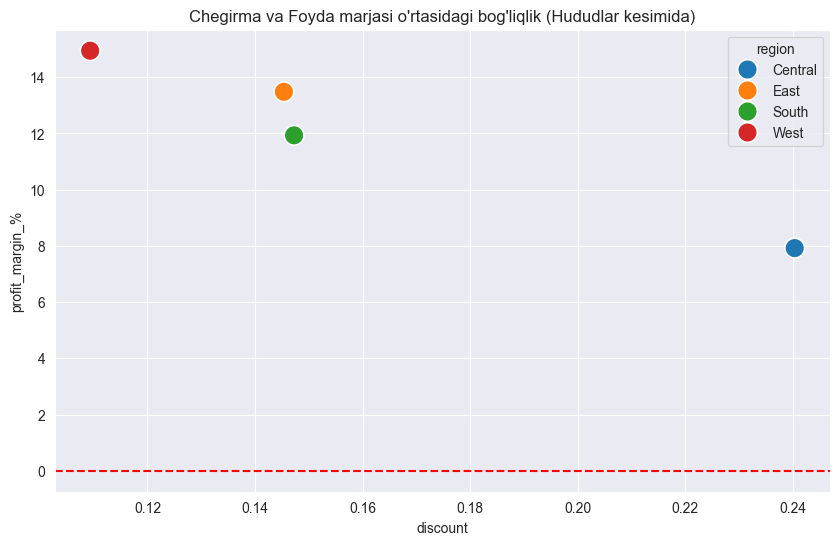

In [19]:
# Endi buni vizual tasdiqlaymiz
plt.figure(figsize=(10, 6))
sns.scatterplot(data=region_stats, x='discount', y='profit_margin_%', hue='region', s=200)

plt.title("Chegirma va Foyda marjasi o'rtasidagi bog'liqlik (Hududlar kesimida)")
plt.axhline(0, color='red', linestyle='--') # 0 chizig'i
plt.grid(True)
plt.show()

In [23]:
central_df=df[df['region']=='Central']

# Segmentlar bo'yicha chegirma va foyda
segment_analysis=central_df.groupby('segment').agg({
    'discount':'mean',
    'profit':'sum'
}).sort_values(by='discount', ascending=False).reset_index()

print("Markaziy hududda segmentlar tahlili :")
print(segment_analysis)

Markaziy hududda segmentlar tahlili :
       segment  discount      profit
0     Consumer  0.252030   8564.0481
1    Corporate  0.239822  18703.9020
2  Home Office  0.208858  12438.4124


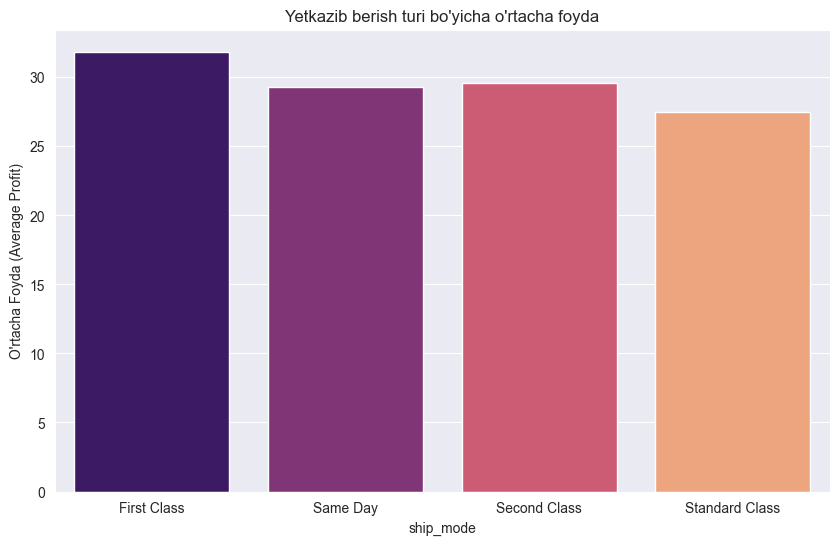

In [25]:
# Ship mode bo'yicha o'rtacha foyda va savdo
ship_analysis=df.groupby('ship_mode').agg({
    'profit':'mean',
    'sales':'mean',
    'discount':'mean'
}).reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(data=ship_analysis, x='ship_mode', y='profit', palette='magma', hue='ship_mode')
plt.title("Yetkazib berish turi bo'yicha o'rtacha foyda")
plt.ylabel("O'rtacha Foyda (Average Profit)")
plt.show()

In [28]:
# Power BI uchun barcha yangi ustunlar (oy, yil, foyda marjasi) bilan saqlaymiz
df['profit_margin']=(df['profit']/df['sales'])*100
df.to_csv(r"E:\Project_4\DATA\Ready - Superstore.csv", index=False)
print('File saqlandi')

File saqlandi
